In [26]:
from time import time

import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt
import nltk

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from scipy.stats import kurtosis

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [10]:
trainSet = pd.read_csv('dota2Train.csv')
testSet = pd.read_csv('dota2Test.csv')

x = trainSet.drop('-1', 1)
y = trainSet['-1']
xVal = testSet.drop('-1', 1)
yVal = testSet['-1']

np.random.seed(42)

n_samples, n_features = x.shape
n_classes = len(np.unique(y))
labels = y
sample_size = n_samples * 0.16
print n_samples
print n_features
print n_classes

92649
116
2


In [3]:
# Procedure 1
KList = [1,2,5,10,20,30,40,50,100,200,400,800]
# KList = [6400]
print('init\t\tK\thomo\tcompl\tv-meas\tARI\tAMI')
for i in KList:   
    clu = KMeans(init='k-means++', n_clusters=i,n_init=10, max_iter = 10000)
    # X_reduced = dra.fit_transform(myOriginalDataX)
    clu.fit(x)
    predictions = clu.predict(x)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))
for i in KList:  
    clu = KMeans(init='random', n_clusters=i, n_init=10, max_iter = 10000)
    clu.fit(x)
    predictions = clu.predict(x)
    print('random\t\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

init		K	homo	compl	v-meas	ARI	AMI
random		1	0.000	1.000	0.000	0.000	0.000	
random		2	0.000	0.000	0.000	-0.000	-0.000	
random		5	0.000	0.000	0.000	0.000	0.000	
random		10	0.000	0.000	0.000	0.000	0.000	
random		20	0.000	0.000	0.000	0.000	-0.000	
random		30	0.001	0.000	0.000	0.000	0.000	
random		40	0.001	0.000	0.000	0.000	0.000	
random		50	0.001	0.000	0.000	0.000	0.000	
random		100	0.003	0.000	0.001	0.000	0.000	
random		200	0.005	0.001	0.001	0.000	0.000	
random		400	0.007	0.001	0.001	0.000	0.000	
random		800	0.011	0.001	0.002	0.000	0.000	


In [ ]:
# Procedure 1
KList = [1, 5, 10, 15, 20, 30, 40, 50]
print('init\t\tK\thomo\tcompl\tv-meas\tARI\tAMI')
for i in KList:   
    clu = GaussianMixture(init_params='kmeans', n_components=i,n_init=10, max_iter = 10000)
    clu.fit(x)
    predictions = clu.predict(x)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))
for i in KList:  
    clu = GaussianMixture(init_params='random', n_components=i, n_init=10, max_iter = 10000)
    clu.fit(x)
    predictions = clu.predict(x)
    print('random\t\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

In [40]:
# Procedure 2
pca = PCA(n_components = 2)
ica = FastICA(n_components = 2)
rp = GaussianRandomProjection(n_components = 2)
svd = TruncatedSVD(n_components =2 )

pca_x = pca.fit_transform(x)
ica_x = ica.fit_transform(x)
rp_x = rp.fit_transform(x)
svd_x = svd.fit_transform(x)

# print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t'
#      % (kurtosis(x), 
#         kurtosis(pca_x),
#         kurtosis(ica_x),
#         kurtosis(rp_x),
#         kurtosis(nmf_x)))

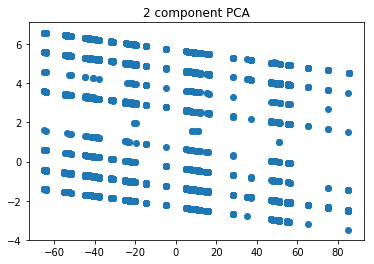

In [41]:
xplot = []
yplot = []
for item in pca_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component PCA")
plt.scatter(xplot,yplot)

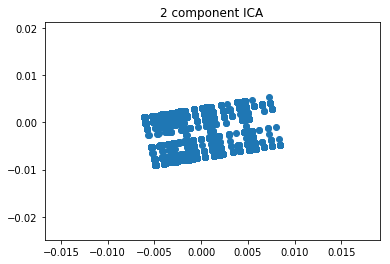

In [42]:
xplot = []
yplot = []
for item in ica_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component ICA")
plt.scatter(xplot,yplot)

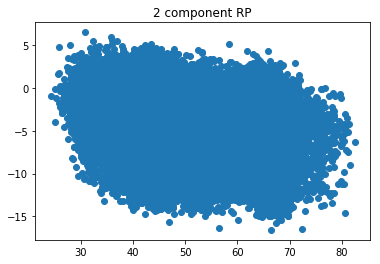

In [43]:
xplot = []
yplot = []
for item in rp_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component RP")
plt.scatter(xplot,yplot)

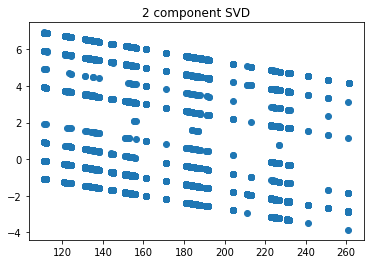

In [44]:
xplot = []
yplot = []
for item in svd_x:
    xplot.append(item[0])
    yplot.append(item[1])
    
plt.figure()
plt.title("2 component SVD")
plt.scatter(xplot,yplot)

In [4]:
#Procedure 3
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.008	0.001	0.002	0.000	0.000	
kmeans++	2	0.008	0.001	0.002	0.000	0.000	
kmeans++	3	0.010	0.001	0.002	0.000	0.000	
kmeans++	4	0.010	0.001	0.002	0.000	0.000	
kmeans++	5	0.011	0.001	0.002	0.000	0.000	
kmeans++	6	0.011	0.001	0.002	0.000	0.000	
kmeans++	7	0.011	0.001	0.002	0.000	0.000	
kmeans++	8	0.011	0.001	0.002	0.000	0.000	
kmeans++	9	0.011	0.001	0.002	0.000	0.000	
kmeans++	10	0.011	0.001	0.002	0.000	0.000	


In [ ]:
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu =  KMeans(init='random', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

In [5]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

kmeans++	1	0.008	0.001	0.002	0.000	0.000	-0.437
kmeans++	2	0.008	0.001	0.002	0.000	0.000	-0.976
kmeans++	3	0.010	0.001	0.002	0.000	0.000	-1.219
kmeans++	4	0.012	0.001	0.002	0.000	0.001	-1.151
kmeans++	5	0.012	0.001	0.002	0.000	0.001	-1.123
kmeans++	6	0.013	0.001	0.002	0.000	0.001	-1.238
kmeans++	7	0.012	0.001	0.002	0.000	0.001	-1.183
kmeans++	8	0.012	0.001	0.002	0.000	0.001	-1.053
kmeans++	9	0.012	0.001	0.002	0.000	0.001	-1.086
kmeans++	10	0.011	0.001	0.002	0.000	0.001	-1.061


In [ ]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu =  KMeans(init='random', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

In [6]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.006	0.001	0.001	-0.000	-0.000	
kmeans++	2	0.007	0.001	0.001	0.000	0.000	
kmeans++	3	0.006	0.001	0.001	-0.000	-0.000	
kmeans++	4	0.008	0.001	0.002	0.000	0.000	
kmeans++	5	0.010	0.001	0.002	0.000	0.000	
kmeans++	6	0.008	0.001	0.001	0.000	0.000	
kmeans++	7	0.008	0.001	0.001	0.000	0.000	
kmeans++	8	0.009	0.001	0.002	0.000	0.000	
kmeans++	9	0.009	0.001	0.002	0.000	0.000	
kmeans++	10	0.009	0.001	0.002	0.000	0.000	


In [ ]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu =  KMeans(init='random', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
        % (i, metrics.homogeneity_score(y, predictions),
        metrics.completeness_score(y, predictions),
        metrics.v_measure_score(y, predictions),
        metrics.adjusted_rand_score(y, predictions),
        metrics.adjusted_mutual_info_score(y, predictions)))

In [27]:
for i in range(1, 11):
    dra = TruncatedSVD(n_components=i)
    clu =  KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.008	0.001	0.002	0.000	0.000	
kmeans++	2	0.008	0.001	0.002	0.000	0.000	
kmeans++	3	0.010	0.001	0.002	0.000	0.000	
kmeans++	4	0.010	0.001	0.002	0.000	0.000	
kmeans++	5	0.010	0.001	0.002	0.000	0.000	
kmeans++	6	0.010	0.001	0.002	0.000	0.000	
kmeans++	7	0.010	0.001	0.002	0.000	0.000	
kmeans++	8	0.010	0.001	0.002	0.000	0.000	
kmeans++	9	0.011	0.001	0.002	0.000	0.000	
kmeans++	10	0.010	0.001	0.002	0.000	0.000	


In [ ]:
for i in range(1, 11):
    dra =TruncatedSVD(n_components=i)
    clu =  KMeans(init='random', n_clusters=800,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
        % (i, metrics.homogeneity_score(y, predictions),
        metrics.completeness_score(y, predictions),
        metrics.v_measure_score(y, predictions),
        metrics.adjusted_rand_score(y, predictions),
        metrics.adjusted_mutual_info_score(y, predictions)))

In [34]:
#Procedure 3
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.000	0.000	0.000	0.000	0.000	
kmeans++	2	0.000	0.000	0.000	0.000	0.000	
kmeans++	3	0.000	0.000	0.000	-0.000	0.000	
kmeans++	4	0.000	0.000	0.000	0.000	0.000	
kmeans++	5	0.000	0.000	0.000	-0.000	0.000	
kmeans++	6	0.000	0.000	0.000	-0.000	0.000	
kmeans++	7	0.000	0.000	0.000	0.000	0.000	
kmeans++	8	0.000	0.000	0.000	-0.000	0.000	
kmeans++	9	0.000	0.000	0.000	0.000	0.000	
kmeans++	10	0.000	0.000	0.000	-0.000	0.000	


In [ ]:
for i in range(1, 11):
    dra = PCA(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

In [35]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

kmeans++	1	0.000	0.000	0.000	-0.000	-0.000	-1.206
kmeans++	2	0.000	0.000	0.000	-0.000	0.000	-0.263
kmeans++	3	0.003	0.001	0.002	0.000	0.001	1.146
kmeans++	4	0.003	0.001	0.001	0.000	0.001	-1.360
kmeans++	5	0.003	0.001	0.001	0.000	0.001	-0.734
kmeans++	6	0.003	0.001	0.001	0.000	0.001	-0.742
kmeans++	7	0.002	0.001	0.001	0.000	0.001	-0.675
kmeans++	8	0.003	0.001	0.001	0.001	0.001	-1.294
kmeans++	9	0.001	0.000	0.000	0.000	0.000	-1.276
kmeans++	10	0.002	0.000	0.001	0.000	0.000	-1.173


In [ ]:
for i in range(1, 11):
    dra = FastICA(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions),
            kurtosis(predictions)))

In [36]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.000	0.000	0.000	0.000	0.000	
kmeans++	2	0.000	0.000	0.000	0.000	-0.000	
kmeans++	3	0.000	0.000	0.000	0.000	0.000	
kmeans++	4	0.001	0.000	0.000	0.000	0.000	
kmeans++	5	0.000	0.000	0.000	0.000	0.000	
kmeans++	6	0.000	0.000	0.000	0.000	0.000	
kmeans++	7	0.000	0.000	0.000	0.000	0.000	
kmeans++	8	0.000	0.000	0.000	0.000	0.000	
kmeans++	9	0.000	0.000	0.000	0.000	-0.000	
kmeans++	10	0.000	0.000	0.000	0.000	-0.000	


In [ ]:
for i in range(1, 11):
    dra = GaussianRandomProjection(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
      % (i, metrics.homogeneity_score(y, predictions),
      metrics.completeness_score(y, predictions),
      metrics.v_measure_score(y, predictions),
      metrics.adjusted_rand_score(y, predictions),
      metrics.adjusted_mutual_info_score(y, predictions)))

In [37]:
for i in range(1, 11):
    dra = TruncatedSVD(n_components=i)
    clu = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('kmeans++\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
          % (i, metrics.homogeneity_score(y, predictions),
          metrics.completeness_score(y, predictions),
          metrics.v_measure_score(y, predictions),
          metrics.adjusted_rand_score(y, predictions),
          metrics.adjusted_mutual_info_score(y, predictions)))

kmeans++	1	0.000	0.000	0.000	0.000	0.000	
kmeans++	2	0.000	0.000	0.000	0.000	0.000	
kmeans++	3	0.000	0.000	0.000	-0.000	0.000	
kmeans++	4	0.000	0.000	0.000	0.000	0.000	
kmeans++	5	0.000	0.000	0.000	0.000	0.000	
kmeans++	6	0.000	0.000	0.000	0.000	0.000	
kmeans++	7	0.000	0.000	0.000	0.000	0.000	
kmeans++	8	0.000	0.000	0.000	-0.000	0.000	
kmeans++	9	0.000	0.000	0.000	0.000	0.000	
kmeans++	10	0.000	0.000	0.000	-0.000	0.000	


In [ ]:
for i in range(1, 11):
    dra = TruncatedSVD(n_components=i)
    clu = GaussianMixture(init_params='random', n_components=20,n_init=10, max_iter = 10000)
    X_reduced = dra.fit_transform(x)
    clu.fit(X_reduced)
    predictions = clu.predict(X_reduced)
    print('random\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t' 
        % (i, metrics.homogeneity_score(y, predictions),
        metrics.completeness_score(y, predictions),
        metrics.v_measure_score(y, predictions),
        metrics.adjusted_rand_score(y, predictions),
        metrics.adjusted_mutual_info_score(y, predictions)))

In [29]:
# Procedure 4
xTrain = x
yTrain = y

pca = PCA(n_components = 5)
ica = FastICA(n_components = 6)
rp = GaussianRandomProjection(n_components = 6)
svd = TruncatedSVD(n_components=i)

pca = pca.fit(xTrain)
ica = ica.fit(xTrain)
rp = rp.fit(xTrain)
svd = svd.fit(xTrain)

pca_xTrain = pca.transform(xTrain)
pca_xTest = pca.transform(xVal)
ica_xTrain = ica.transform(xTrain)
ica_xTest = ica.transform(xVal)
rp_xTrain = rp.transform(xTrain)
rp_xTest = rp.transform(xVal)
svd_xTrain = svd.transform(xTrain)
svd_xTest = svd.transform(xVal)

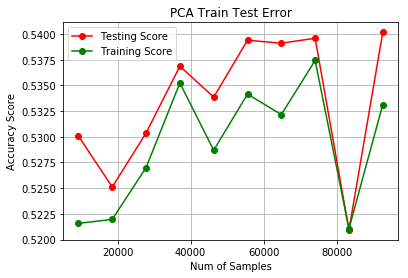

In [14]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = pca_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(pca_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(pca_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("PCA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

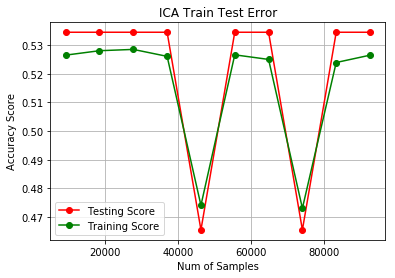

In [15]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = ica_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(ica_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(ica_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("ICA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

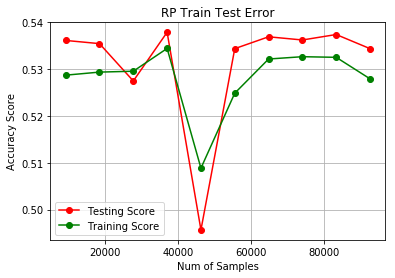

In [16]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = rp_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(rp_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(rp_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("RP Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

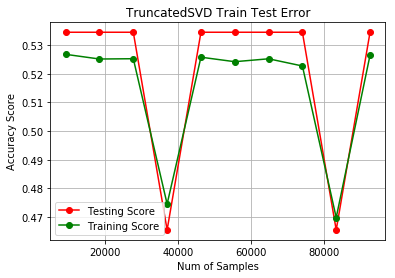

In [30]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = svd_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(svd_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(svd_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("TruncatedSVD Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [17]:
# Procedure 5
kmeans = KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(pca_xTrain)
em = em.fit(pca_xTrain)

kmeans_xTrain = kmeans.transform(pca_xTrain)
kmeans_xTest = kmeans.transform(pca_xTest)
em_xTrain = em.predict_proba(pca_xTrain)
em_xTest = em.predict_proba(pca_xTest)

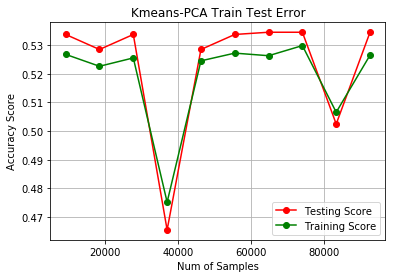

In [18]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc--
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Kmeans-PCA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

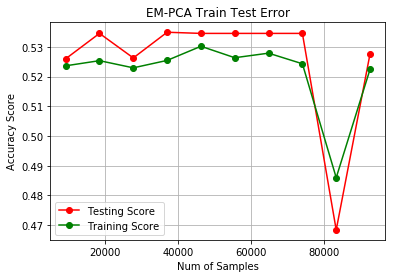

In [19]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("EM-PCA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [20]:
# Procedure 5
kmeans = KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(ica_xTrain)
em = em.fit(ica_xTrain)

kmeans_xTrain = kmeans.transform(ica_xTrain)
kmeans_xTest = kmeans.transform(ica_xTest)
em_xTrain = em.predict_proba(ica_xTrain)
em_xTest = em.predict_proba(ica_xTest)

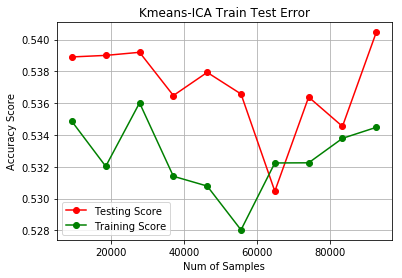

In [21]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Kmeans-ICA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

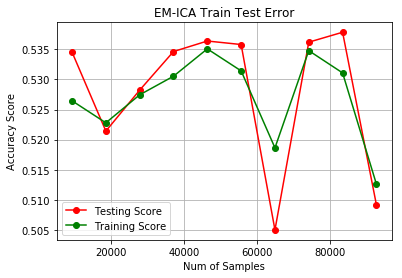

In [22]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("EM-ICA Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [23]:
# Procedure 5
kmeans = KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(rp_xTrain)
em = em.fit(rp_xTrain)

kmeans_xTrain = kmeans.transform(rp_xTrain)
kmeans_xTest = kmeans.transform(rp_xTest)
em_xTrain = em.predict_proba(rp_xTrain)
em_xTest = em.predict_proba(rp_xTest)

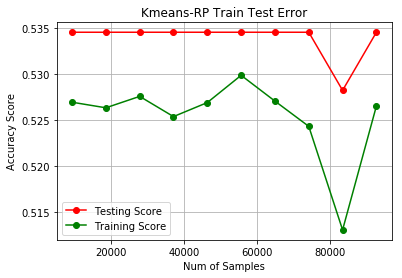

In [24]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Kmeans-RP Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

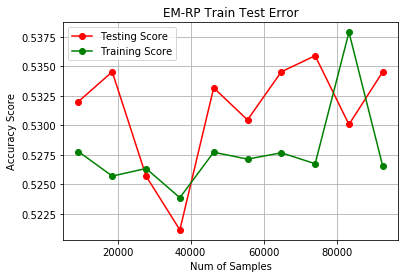

In [25]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("EM-RP Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

In [31]:
# Procedure 5
kmeans = KMeans(init='k-means++', n_clusters=800,n_init=10, max_iter = 10000)
em = GaussianMixture(init_params='kmeans', n_components=20,n_init=10, max_iter = 10000)

kmeans = kmeans.fit(svd_xTrain)
em = em.fit(svd_xTrain)

kmeans_xTrain = kmeans.transform(svd_xTrain)
kmeans_xTest = kmeans.transform(svd_xTest)
em_xTrain = em.predict_proba(svd_xTrain)
em_xTest = em.predict_proba(svd_xTest)

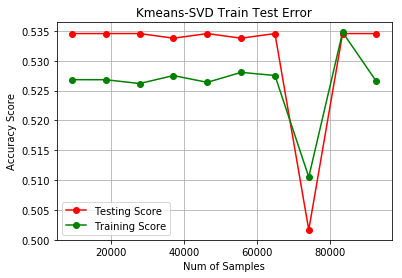

In [32]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = kmeans_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(kmeans_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(kmeans_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("Kmeans-SVD Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")

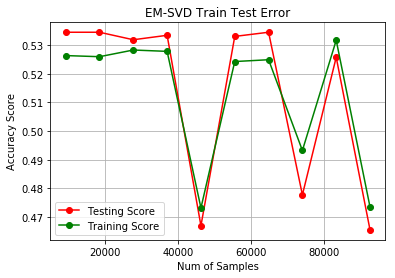

In [33]:
sampleNum = []
trainScoreArr = []
testScoreArr = []
index = -1
bestScore = 0

for i in range (1, 11):
    xTrainRound = em_xTrain
    yTrainRound = yTrain
    if i < 10:
        xTrainRound, throwaway1, yTrainRound, throwaway2 = train_test_split(em_xTrain, yTrain, test_size=i/10.0)
    
    mlp = MLPClassifier(activation="logistic", learning_rate="constant", max_iter = 100, hidden_layer_sizes = (200,), alpha=0.0005)
    mlp.fit(xTrainRound, yTrainRound)
    
    trainPredRes = mlp.predict(xTrainRound)
    trainPredRes = pd.DataFrame(data=trainPredRes, columns=['hand'])
    trainAcc = accuracy_score(yTrainRound, trainPredRes)
    
    testPredRes = mlp.predict(em_xTest)
    testPredRes = pd.DataFrame(data=testPredRes, columns=['hand'])
    testAcc = accuracy_score(yVal, testPredRes)
    
    if testAcc > bestScore:
        index = i
        bestScore = testAcc
    trainScoreArr.append(trainAcc)
    testScoreArr.append(testAcc)
    sampleNum.append(92649 * i / 10.0)
    

plt.figure()
plt.title("EM-SVD Train Test Error")
plt.xlabel("Num of Samples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.plot(sampleNum, testScoreArr, 'o-', color="r", label = "Testing Score")
plt.plot(sampleNum, trainScoreArr, 'o-', color="g", label = "Training Score")
plt.legend(loc="best")